Chapter 4 continued....

To continue chaper 4 i searched google for a dataset that was related to the companies house data and also to some of the the issues raised in chapter 1 & 2.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv("HR_Employee_Attrition_2021.csv")

In [3]:
#checking to see if all rows and columns have been read in

df.shape

(1470, 36)

In [4]:
#showing column names

df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
#data types of each column, if values in a column are mixed the data type will be returned as an object

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#importing tools 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#identifying roles in the 'job Role' column

df['JobRole'].value_counts().nlargest(20)

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Function to combine Sales Executive and Sales Representative and also combine Research Scientist with Research Director. To give a more general overview of job role to later compare attrition rate.

In [8]:
def job_role_cleaner(title):
    if 'sales executive' in title.lower() or 'sales representative' in title.lower():
        return 'sales'
    elif 'research scientist' in title.lower() or 'research director' in title.lower():
        return 'research'
    elif 'laboratory technician' in title.lower():
        return 'laboratory technician'
    elif 'manufacturing director' in title.lower():
        return 'manufacturing director'
    elif 'healthcare representative' in title.lower():
        return 'healthcare representative'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'human resources' in title.lower():
        return 'human resources'
    else: 
        return 'other'
    
df['JobRole'] = df['JobRole'].apply(job_role_cleaner)
df['JobRole'].value_counts()

sales                        409
research                     372
laboratory technician        259
manufacturing director       145
healthcare representative    131
manager                      102
human resources               52
Name: JobRole, dtype: int64

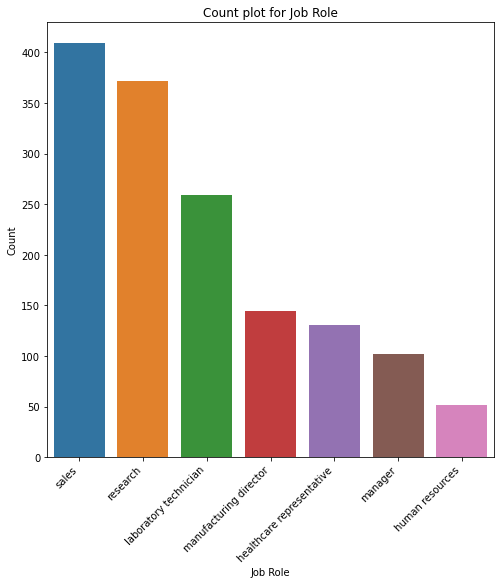

In [9]:
#countplot to show the number of people in our generalised job role's

plt.figure(figsize=(8,8))
g = sns.countplot(x='JobRole', data=df, order = df['JobRole'].value_counts().index) # Creating a count plot using the job title column and order them based on the highest count to the least (https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
p = plt.title('Count plot for Job Role')
p = plt.xlabel('Job Role')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

Moving on to Visualising data for column 'Years in current role'

In [10]:
#statistical overview of 'YearsInCurrentRole' column

df.describe()['YearsInCurrentRole']

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

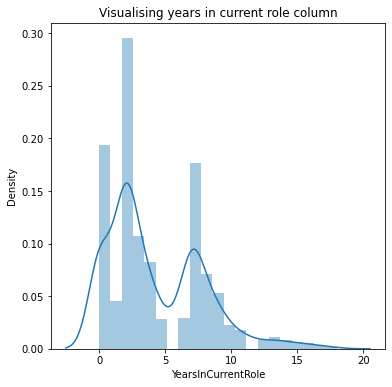

In [11]:
#visualising 'YearsInCurrentRole' column

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['YearsInCurrentRole'])
p = plt.title('Visualising years in current role column')

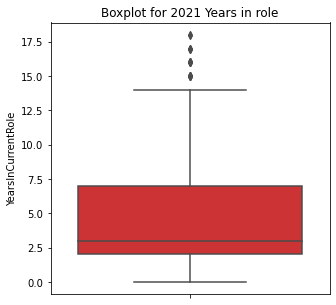

In [12]:
#boxplot to identify 'YearsInCurrentRole' column - identifying outliers

plt.figure(figsize=(5,5))
sns.boxplot(y='YearsInCurrentRole', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for 2021 Years in role')
p = plt.ylabel('YearsInCurrentRole')

In [13]:
# function to find outliers 
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

Summary of outliers

In [14]:
outliers = find_outliers_IQR(df['YearsInCurrentRole'])

In [15]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 21


In [16]:
print("max outlier value: "+ str(outliers.max()))

max outlier value: 18


In [17]:
print("min outlier value: "+ str(outliers.min()))

min outlier value: 15


For the column of years in current role i decided to leave the outliers in the dataset. It is reasonable to assume that someone could be in a Job Role for 18 years and the 21 outliers are not measurement or data entry errors.

Visualising data from Job Satisfaction column:

In [18]:
df.describe()['JobSatisfaction']

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

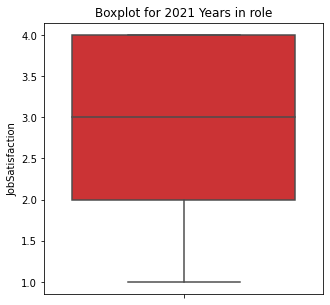

In [19]:
plt.figure(figsize=(5,5))
sns.boxplot(y='JobSatisfaction', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for 2021 Years in role')
p = plt.ylabel('JobSatisfaction')

In [20]:
outliers = find_outliers_IQR(df['JobSatisfaction'])

In [21]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 0


No outliers identified in the Job satisfaction column so no cleaning required

Visualisation of Monthly Income Column:

In [22]:
df.describe()['MonthlyIncome']

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

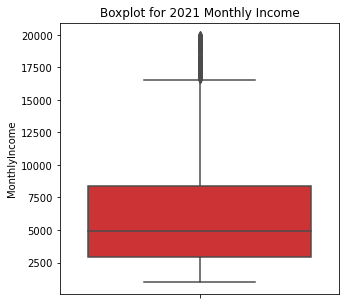

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y='MonthlyIncome', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for 2021 Monthly Income')
p = plt.ylabel('MonthlyIncome')

In [24]:
outliers = find_outliers_IQR(df['MonthlyIncome'])

In [25]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 114


Justification for leaving in outliers

Although many outliers were identified in the monthly income column i have decided to leave them in. After checking the background of the dataset i became aware that the data was produced by a HR analytics team and therefore the income was not self declared so may be accurate. Although some of the data may fall outside the Inter Quartile Range i have assumed that the input is correct and removing the outliers may have a negative affect on the follow up analysis.

Pivot tables showing aggregated data:

Summarising the data of the three columns visualised above. 

In [26]:
#displaying mean years at company grouped by job role
years_at_company = df.groupby('JobRole').agg(mean_years_in_role = ('YearsInCurrentRole', 'mean')).sort_values(by='mean_years_in_role', ascending=False)
print(years_at_company)

                           mean_years_in_role
JobRole                                      
manager                              6.450980
manufacturing director               4.972414
healthcare representative            4.862595
sales                                4.278729
research                             3.922043
laboratory technician                3.200772
human resources                      3.134615


<AxesSubplot:xlabel='JobRole'>

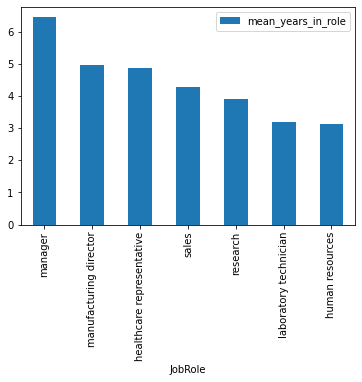

In [27]:
# visualising mean years at company - bar chart

years_at_company.plot(kind="bar")

In [28]:
#displaying mean monthly income grouped by job role


average_monthly_pay = df.groupby('JobRole').agg(mean_pay = ('MonthlyIncome', 'mean')).sort_values(by='mean_pay', ascending=False)
print(average_monthly_pay)

                               mean_pay
JobRole                                
manager                    17181.676471
healthcare representative   7528.763359
manufacturing director      7295.137931
sales                       6052.012225
research                    5991.279570
human resources             4235.750000
laboratory technician       3237.169884


<AxesSubplot:xlabel='JobRole'>

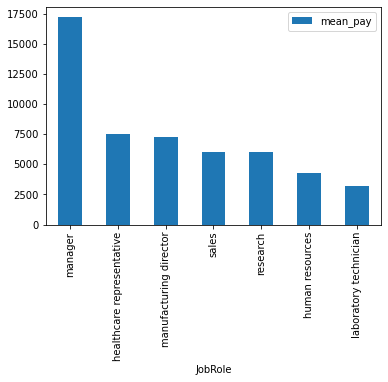

In [29]:
# visualising mean pay per sector - bar chart

average_monthly_pay.plot(kind="bar")

In [30]:
#displaying mean job satisfaction grouped by job role


job_satisfaction = df.groupby('JobRole').agg(mean_satisfaction = ('JobSatisfaction', 'mean')).sort_values(by='mean_satisfaction', ascending=False)
print(job_satisfaction)

                           mean_satisfaction
JobRole                                     
healthcare representative           2.786260
research                            2.758065
sales                               2.750611
manager                             2.705882
laboratory technician               2.691120
manufacturing director              2.682759
human resources                     2.557692


<AxesSubplot:xlabel='JobRole'>

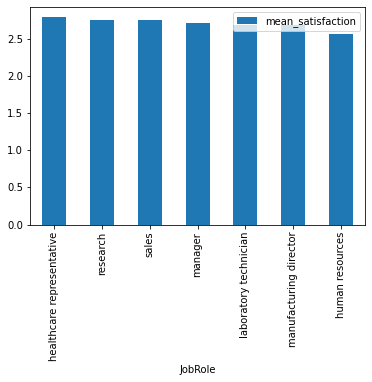

In [31]:
# visualising mean job satisfaction - bar chart

job_satisfaction.plot(kind="bar")

In [32]:
#merging aggregated data together

pivot_data = pd.merge(years_at_company, average_monthly_pay, how="right", on='JobRole')

print(pivot_data)

                           mean_years_in_role      mean_pay
JobRole                                                    
manager                              6.450980  17181.676471
healthcare representative            4.862595   7528.763359
manufacturing director               4.972414   7295.137931
sales                                4.278729   6052.012225
research                             3.922043   5991.279570
human resources                      3.134615   4235.750000
laboratory technician                3.200772   3237.169884


In [33]:
# final merged table to see average yeaes in role, job satisfaction, and monthly income


final_pivot = pd.merge(pivot_data, job_satisfaction, how="right", on='JobRole')
print(final_pivot)

                           mean_years_in_role      mean_pay  mean_satisfaction
JobRole                                                                       
healthcare representative            4.862595   7528.763359           2.786260
research                             3.922043   5991.279570           2.758065
sales                                4.278729   6052.012225           2.750611
manager                              6.450980  17181.676471           2.705882
laboratory technician                3.200772   3237.169884           2.691120
manufacturing director               4.972414   7295.137931           2.682759
human resources                      3.134615   4235.750000           2.557692


4.5. Conclusions & Further Work 

This intial analysis was intended to give us a brief overview of the statistics surrounding companies with SICCODE 22190. 
The processes followed above will give anyone picking up this subject a starting point for further analysis.

The analysis of the companies house was of limited benefit and no real conclusions could be drawn from it.
The found data showing HR analysed data of attrition rates per sector provided us with a good basis for further investigation into the issues raised in chapters 1 & 2.

One of the issues addressed was the high turnover of staff in Sales and middle management positions. Looking at this dataset has gave us a bit more insight into the issue raised. From this dataset we can see that sales jobs are not amongst the lowest for years spent in current role, they are the 4th highest of 6 sectors. They are also fourth highest in terms of monthly income. The sales sector is third highest in terms of monthly income. 
Management positions hold position 1 in terms of monthly income and also position 1 in average years spent in role. More analysis will be done in chapter 5 to see if there is any correlation between higher incomes and time spent in certain roles.


4.5.1. Effectiveness of Cleaning Techniques, Tools, and Guides

The tools used in this analysis were largely effective with the exception of completely removing the outliers. The pivot table aggregated data of the hr analytics datasheet and their visualisations gives us a good basis for further investigations into the possible correlation between length of time spent in a role and mean pay

4.5.2. Further Work

If a dataset could be found which represented roles within our industry the analysis could be repeated to give us specific data related to our industry. We could then make better reccomendations based on more specific data.

4.6. Appendix

4.7. References